In [19]:
# Import the libraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="energy_data",
    user="postgres",
    password="aoufnihed"
)


In [21]:
# Define the SQL query for energy_consumption_forecasts
query = "SELECT * FROM energy_consumption_forecasts;"

In [22]:
# Read data into a pandas DataFrame
df_energy_consumption_forecasts = pd.read_sql_query(query, conn)

C:\Users\hey\AppData\Local\Temp\ipykernel_16540\1122062232.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_energy_consumption_forecasts = pd.read_sql_query(query, conn)


In [23]:
conn.close()

In [24]:
df_energy_consumption_forecasts.head()

,datetime,heures,consommation,previsionj1,previsionj
0,2022-01-01,00:00:00,54615.0,51500.0,54200.0
1,2022-01-01,00:15:00,NaN,51100.0,53750.0
2,2022-01-01,00:30:00,54015.0,50700.0,53300.0
3,2022-01-01,00:45:00,NaN,49850.0,52400.0
4,2022-01-01,01:00:00,52108.0,49000.0,51500.0


In [25]:
df_energy_consumption_forecasts.tail()

,datetime,heures,consommation,previsionj1,previsionj
35035,2022-12-31,22:45:00,NaN,45800.0,45500.0
35036,2022-12-31,23:00:00,47688.0,47000.0,46700.0
35037,2022-12-31,23:15:00,NaN,47250.0,47000.0
35038,2022-12-31,23:30:00,47519.0,47500.0,47300.0
35039,2022-12-31,23:45:00,NaN,47050.0,46950.0


In [26]:
df_energy_consumption_forecasts.describe()

,datetime,consommation,previsionj1,previsionj
count,35040,17520.000000,35040.000000,35040.000000
mean,2022-07-02 00:00:00,51387.245320,50812.998002,50749.536815
min,2022-01-01 00:00:00,30845.000000,29800.000000,29800.000000
25%,2022-04-02 00:00:00,42814.750000,42350.000000,42400.000000
50%,2022-07-02 00:00:00,49296.000000,48800.000000,48700.000000
75%,2022-10-01 00:00:00,58877.500000,57800.000000,57650.000000
max,2022-12-31 00:00:00,86978.000000,85600.000000,86700.000000
std,NaN,11384.274635,11268.553684,11136.418051


In [27]:
df_energy_consumption_forecasts.duplicated().sum()

0

In [28]:
df_energy_consumption_forecasts.isnull().sum()

datetime            0
heures              0
consommation    17520
previsionj1         0
previsionj          0
dtype: int64

In [29]:
df_energy_consumption_forecasts.dropna(inplace=True)

In [30]:
df_energy_consumption_forecasts.isnull().sum()

datetime        0
heures          0
consommation    0
previsionj1     0
previsionj      0
dtype: int64

In [31]:
df_energy_consumption_forecasts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 0 to 35038
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      17520 non-null  datetime64[ns]
 1   heures        17520 non-null  object        
 2   consommation  17520 non-null  float64       
 3   previsionj1   17520 non-null  float64       
 4   previsionj    17520 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 821.2+ KB


In [32]:
# Assuming your DataFrame is named df
df_energy_consumption_forecasts['datetime'] = pd.to_datetime(df_energy_consumption_forecasts['datetime'])

# Define seasons
def get_season(date):
    year = date.year
    seasons = {
        'spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
        'summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
        'autumn': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
        'winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')
    }
    for season, date_range in seasons.items():
        if date in date_range:
            return season
    return 'winter'  

df_energy_consumption_forecasts['season'] =df_energy_consumption_forecasts['datetime'].apply(get_season)

In [33]:
# Define periods of the day
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [34]:
df_energy_consumption_forecasts['heure'] = pd.to_datetime(df_energy_consumption_forecasts['heures'], format='%H:%M:%S').dt.hour
df_energy_consumption_forecasts['period_of_day'] = df_energy_consumption_forecasts['heure'].apply(get_period_of_day)

# Drop the 'heures' and 'heure' columns as they are no longer needed
df_energy_consumption_forecasts.drop(columns=['heures', 'heure'], inplace=True)

In [35]:
df_energy_consumption_forecasts.head()

,datetime,consommation,previsionj1,previsionj,season,period_of_day
0,2022-01-01,54615.0,51500.0,54200.0,winter,night
2,2022-01-01,54015.0,50700.0,53300.0,winter,night
4,2022-01-01,52108.0,49000.0,51500.0,winter,night
6,2022-01-01,52239.0,49400.0,52200.0,winter,night
8,2022-01-01,51803.0,48700.0,51200.0,winter,night


In [36]:
df_energy_consumption_forecasts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 0 to 35038
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       17520 non-null  datetime64[ns]
 1   consommation   17520 non-null  float64       
 2   previsionj1    17520 non-null  float64       
 3   previsionj     17520 non-null  float64       
 4   season         17520 non-null  object        
 5   period_of_day  17520 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 958.1+ KB


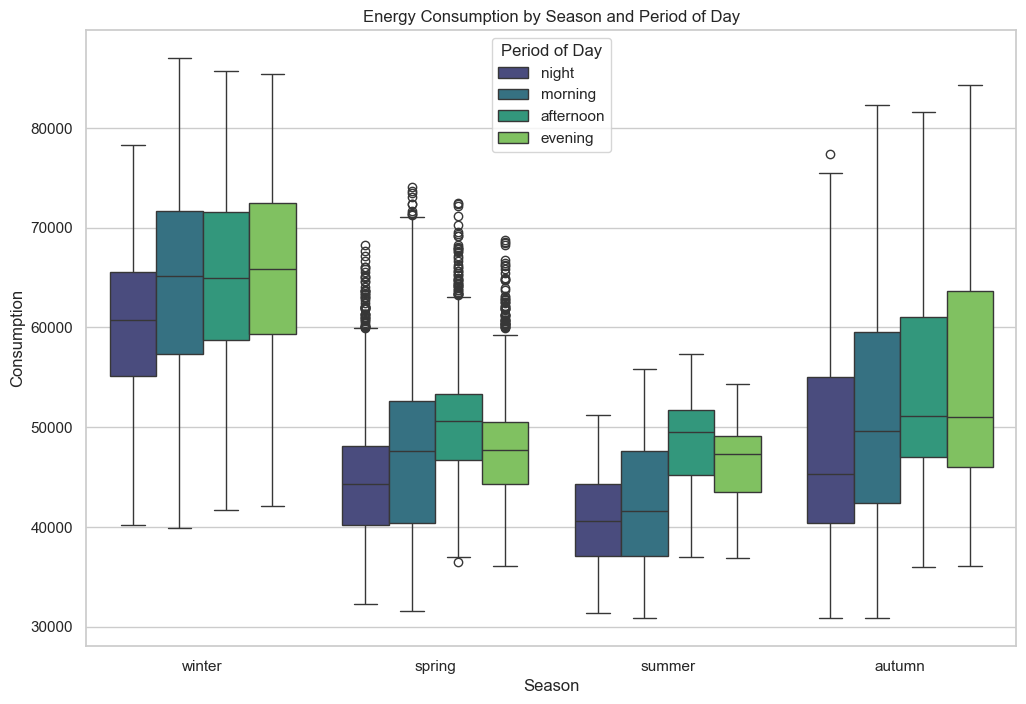

In [37]:
df_energy_consumption_forecasts['datetime'] = pd.to_datetime(df_energy_consumption_forecasts['datetime'])

# Set aesthetics for plots
sns.set(style="whitegrid")

# Plot consumption by season and period of day
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='consommation', hue='period_of_day', data=df_energy_consumption_forecasts, palette="viridis")
plt.title('Energy Consumption by Season and Period of Day')
plt.ylabel('Consumption')
plt.xlabel('Season')
plt.legend(title='Period of Day')
plt.show()

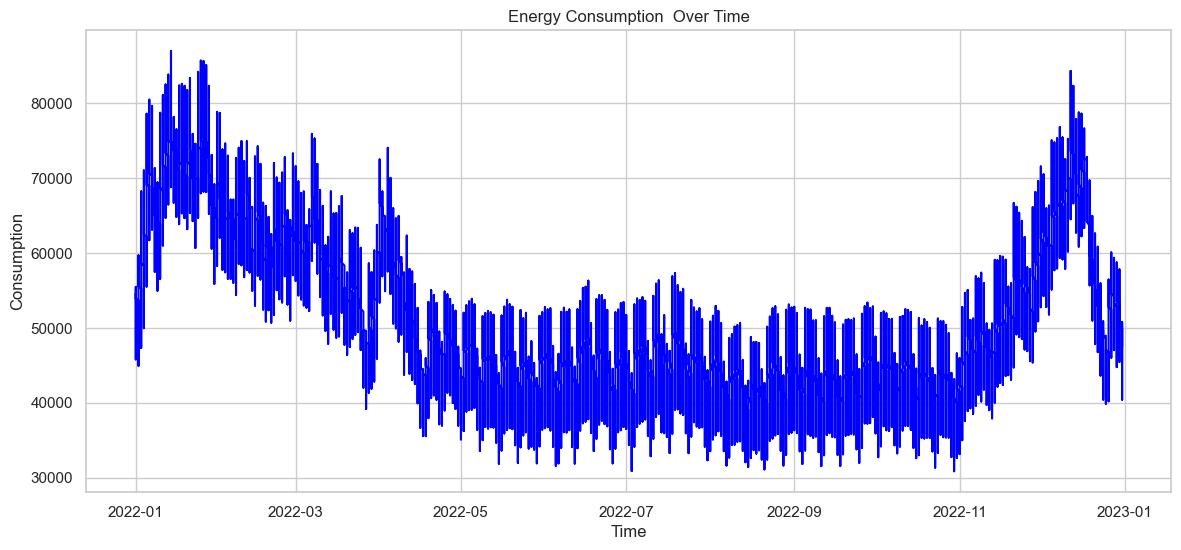

In [39]:
plt.figure(figsize=(14, 6))
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['consommation'], label='Consumption', color='blue')
plt.title('Energy Consumption  Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()

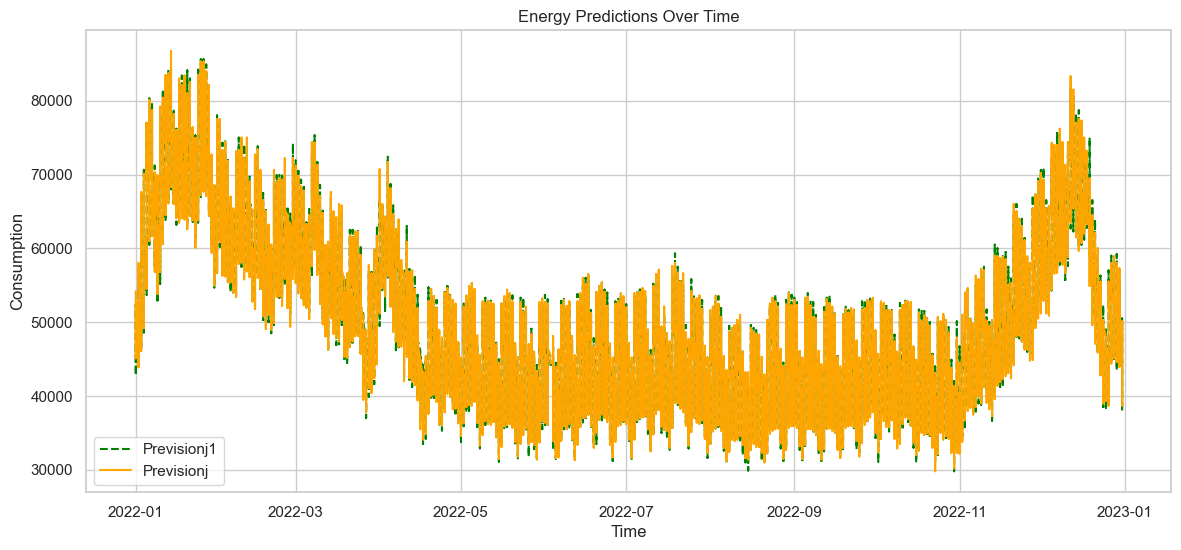

In [44]:
plt.figure(figsize=(14, 6))
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['previsionj1'], label='Previsionj1', linestyle='--', color='green')
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['previsionj'], label='Previsionj', linestyle='-', color='orange')
plt.title('Energy Predictions Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

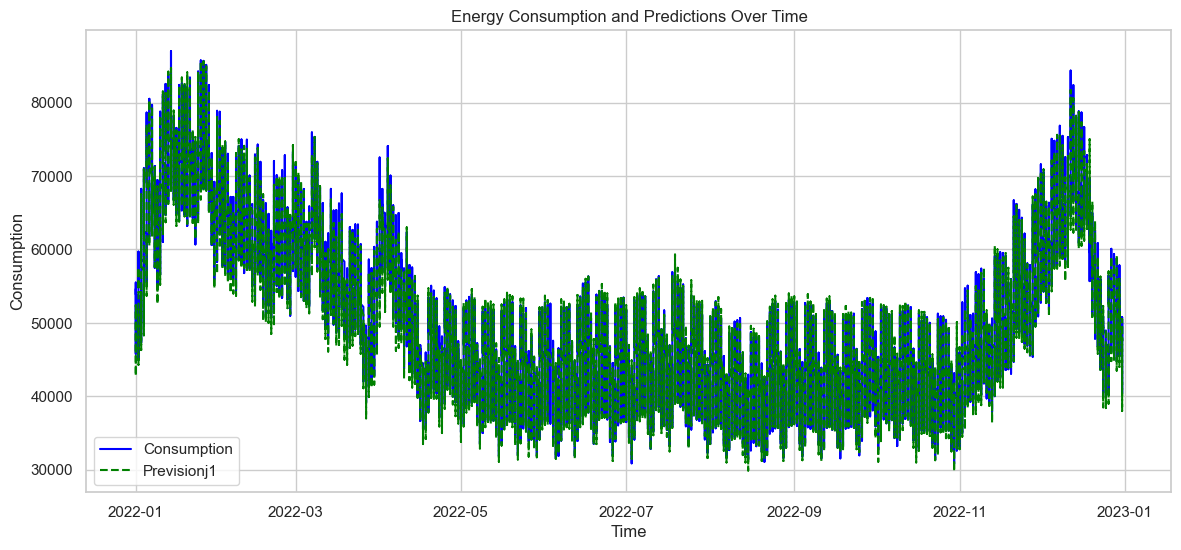

In [45]:
# Plot consumption and predictions over time
plt.figure(figsize=(14, 6))
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['consommation'], label='Consumption', color='blue')
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['previsionj1'], label='Previsionj1', linestyle='--', color='green')
plt.title('Energy Consumption and Predictions Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()


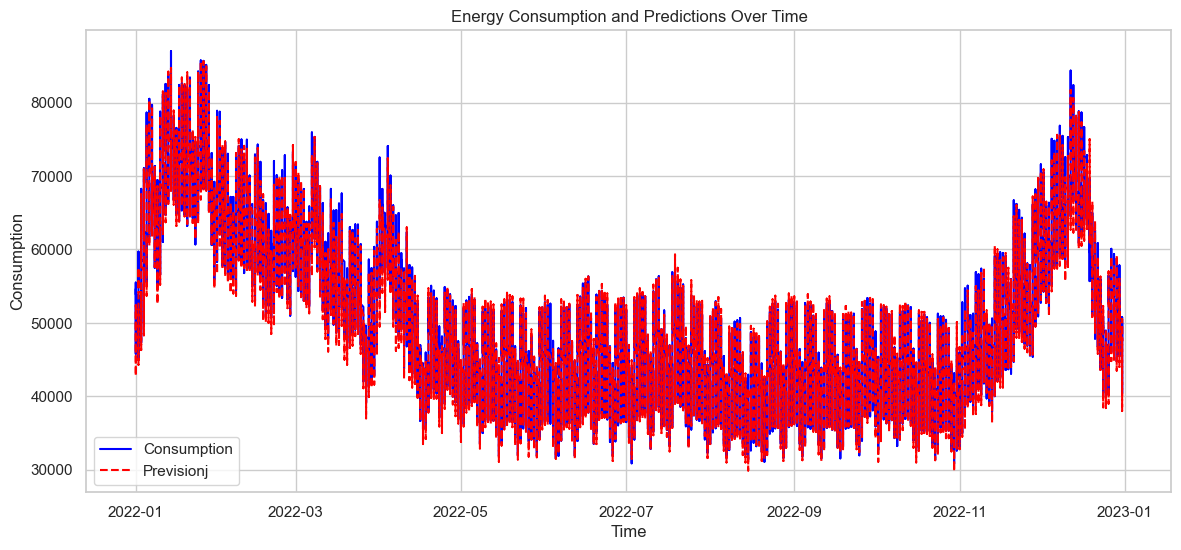

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['consommation'], label='Consumption', color='blue')
plt.plot(df_energy_consumption_forecasts['datetime'], df_energy_consumption_forecasts['previsionj1'], label='Previsionj', linestyle='--', color='red')
plt.title('Energy Consumption and Predictions Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()